<a href="https://colab.research.google.com/github/Shiyasalloor/PYTHON-LABCYCLE/blob/main/Feature_Engineering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

In [ ]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_onehot, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 86ms/step - accuracy: 0.5729 - loss: 1.2041 - val_accuracy: 0.6392 - val_loss: 1.0424
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.6107 - loss: 1.1142 - val_accuracy: 0.6487 - val_loss: 0.9988
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.6319 - loss: 1.0527 - val_accuracy: 0.6565 - val_loss: 0.9873
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.6419 - loss: 1.0164 - val_accuracy: 0.6741 - val_loss: 0.9409
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.6620 - loss: 0.9641 - val_accuracy: 0.6866 - val_loss: 0.9008
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6810 - loss: 0.9093
Test Accuracy: 0.68


In [ ]:
# Predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [ ]:
# Classification report
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.75      0.73      1000
  automobile       0.77      0.81      0.79      1000
        bird       0.56      0.54      0.55      1000
         cat       0.49      0.49      0.49      1000
        deer       0.61      0.65      0.63      1000
         dog       0.62      0.53      0.57      1000
        frog       0.75      0.78      0.76      1000
       horse       0.73      0.75      0.74      1000
        ship       0.75      0.81      0.78      1000
       truck       0.81      0.70      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



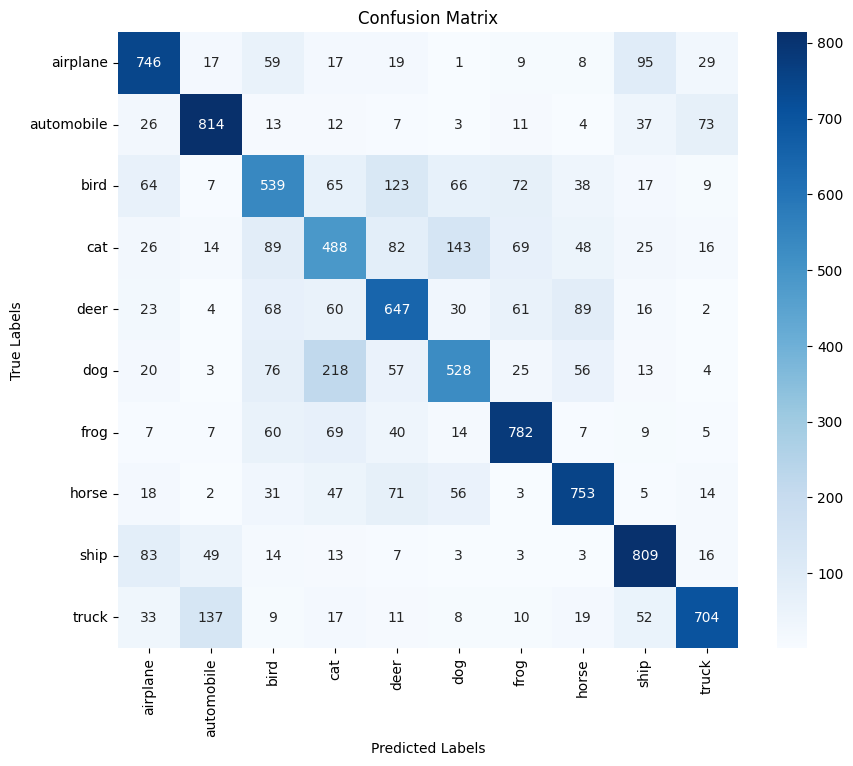

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

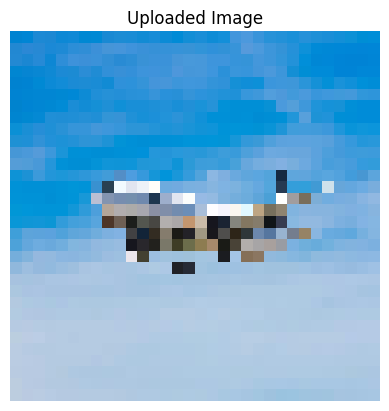

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: airplane


In [ ]:
# Import necessary libraries for image processing
from tensorflow.keras.utils import load_img, img_to_array

# Define class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Load a custom image (replace 'path_to_image.jpg' with your image path)
image_path = '/content/aeroplane.jpeg'  # Upload an image to Colab and provide its path
img = load_img(image_path, target_size=(32, 32))  # Resize image to 32x32
plt.imshow(img)
plt.title("Uploaded Image")
plt.axis('off')
plt.show()

# Preprocess the image
img_array = img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class of the image
prediction_probs = model.predict(img_array)
predicted_class = np.argmax(prediction_probs, axis=1)[0]

# Display the predicted class
print(f"Predicted Class: {class_names[predicted_class]}")
